

---



---



#KNN Algorithm

---


---




#a) Intuition behind the algorithm

---

The KNN algorithm is a method that is mainly used for classification problems but it can also be used for regression ones. KNN comes from K-NearestNeighbors, and as its name suggests it takes into account the nearest neighbors to determine a class or value and it is a simple but effective algorithm, it works in the following way:

It predicts the label or value of an unknown point based on the labels of the “k” nearest points. It first measures the distance between the unknown point and all the other ones in the training set, and the Euclidean distance is the more commonly used. Then, it identifies the K nearest neighbors, K is a value that the user defines before applying the method and it can be any positive integer but when working with classification it should be an odd number so there is no tie between the 2 labels. After identifying the K nearest neighbors, for classification problems, it assigns the label to the point depending on which label is more common between the neighbors identified. For regression, it obtains the average value of the k neighbors and assigns it to the unknown point.

#b) Pseudocode

---

Given:


*   ***TrainingSet***: A set of data points that is already labeled, indicating its class.

*   ***NewPoint***: A new data point whose label needs to be predicted.

*   ***k***: The number of nearest neighbors to consider. It must be a positive integer.

We define:

KNN_Classification(*TrainingSet, NewPoint, k*)

1.   **Calculate Distances**: Compute the distances between the *NewPoint* and all the other points in the *TrainingSet*. A common way to do this is using the Euclidean distance metric, where *x* and *y* are the points to be measured, and *n* represents the number of dimensions in the Euclidean space.



> 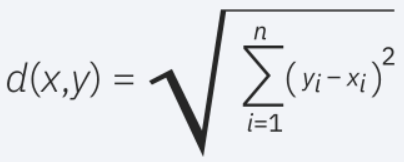



2.   **Sort the Distances**: Sort in ascending order all the points in the *TrainingSet* based on their distance from the *NewPoint*.

3.   **Select k Nearest Neighbors**: Select the first *k* points of the sorted list to be considered.

4.   **Determine the most common class**: Count the number of appearances of each class among the *k* points and the one that appeared the most becomes the prediction.

5.   **Return the Predicted Class**: Return the predicted class of the *NewPoint* as the output of the function.


#c) Algorithm implementation

In [1]:
!pip install numpy scikit-learn

In [256]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [257]:
#I create a sample dataset with x as features and y as label which in this case is 0 or 1
data = np.array([[2.7, 2.5, 0],
                 [1.4, 2.3, 0],
                 [3.8, 4.4, 0],
                 [1.3, 1.8, 0],
                 [3.0, 3.0, 0],
                 [7.6, 2.7, 1],
                 [5.3, 2.0, 1],
                 [6.7, 1.5, 1],
                 [5.1, 1.2, 1],
                 [6.0, 2.2, 1],
                 [2.8, 3.1, 0],
                 [1.5, 1.9, 0],
                 [3.4, 4.1, 0],
                 [1.6, 3.6, 0],
                 [3.1, 4.9, 0],
                 [5.5, 3.0, 1],
                 [4.5, 2.5, 1],
                 [4.8, 1.6, 1],
                 [6.5, 3.7, 1],
                 [3.7, 1.1, 1]])

X = data[:, :-1] #X includes all rows and all columns except for the last column
y = data[:, -1] #y includes all rows of the last column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11) #from dataset 80% training and 20% testing, random state to keep the original shuffle

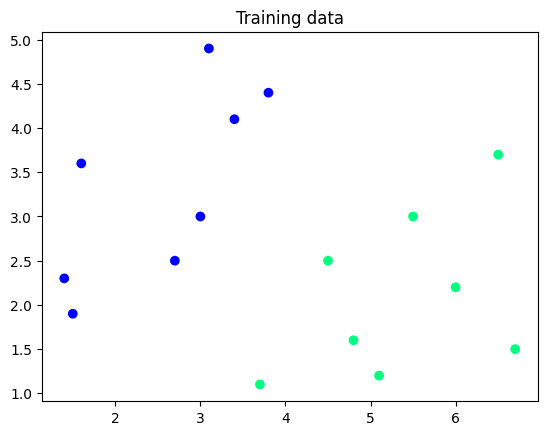

In [258]:
#plot the training dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', label='Training Data')
plt.title('Training data')
plt.show()

In [259]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))  #formula of the euclidean distance

#the actual process of the KNN
def process(X_train, y_train, test_point, k):
    distances = [euclidean_distance(test_point, point) for point in X_train]  #get distancess between the new point and all examples in the training set
    k_neighbors = np.argsort(distances)[:k]  #sort the distances and return the k nearest neighbors
    k_labels = [y_train[i] for i in k_neighbors]  #get the labels of the k nearest neighbors
    return Counter(k_labels).most_common(1)[0][0]  #return the most common label among the neighbors

#function that calls the KNN process for each test point
def predict(X_train, y_train, X_test, k):
    return np.array([process(X_train, y_train, point, k) for point in X_test])  #return an array of the predictions

In [260]:
#call the function with the given number of k neighbors
predictions = predict(X_train, y_train, X_test, k=5)

#print the predictions and actual values
print(f"Predicted labels: {predictions}")
print(f"True labels:      {y_test}")

Predicted labels: [0. 1. 0. 1.]
True labels:      [0. 1. 0. 1.]


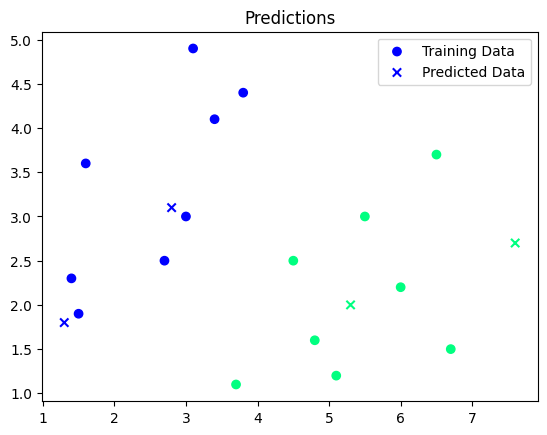

In [261]:
#plot the predictions and the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', label='Training Data')  #plot training data
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='winter', marker='x', label='Predicted Data')  #plot predicted data
plt.title('Predictions')
plt.legend()
plt.show()

#d) Loss Function and Optimization Function


---

KNN does not have a loss function because in machine learning, a loss function measures how good a model is to predict the expected outcome, but in KNN there is no training process, instead, it simply stores all the training data and uses it to make predictions based on similarities. For that reason, there are no parameters being optimized during training, and therefore, there cannot be an optimization function either, because there is no loss function to minimize. Predictions are made by simply looking at the k nearest neighbors.


So, KNN is a little bit different from other machine learning algorithms which have as objective to learn a set of parameters which minimize the loss function. In KNN, there is no training process and the predictions are based on the data points themselves and their proximity to each other.